First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  -----

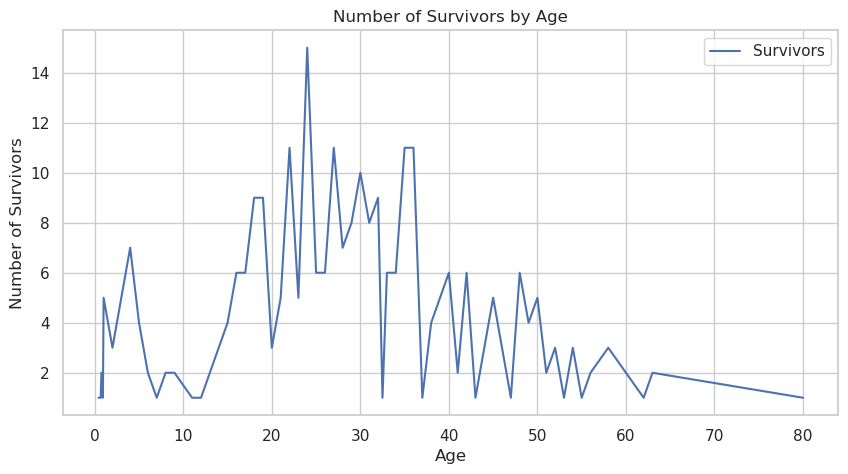

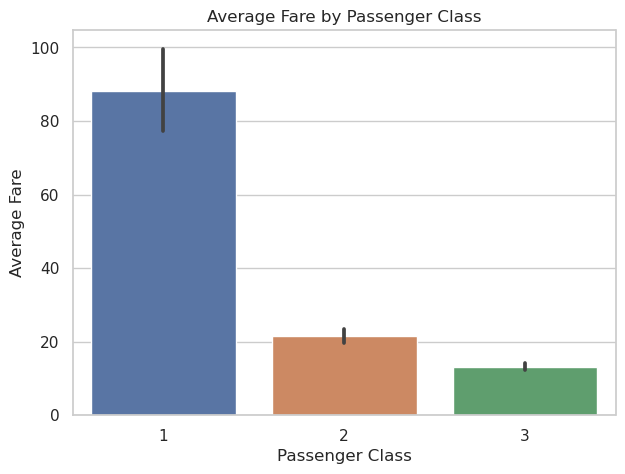

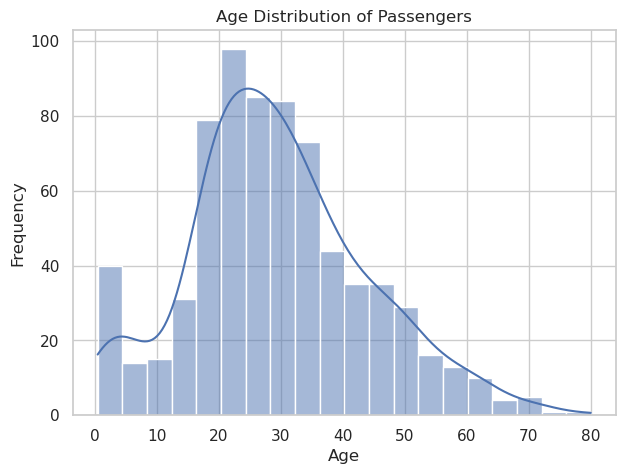

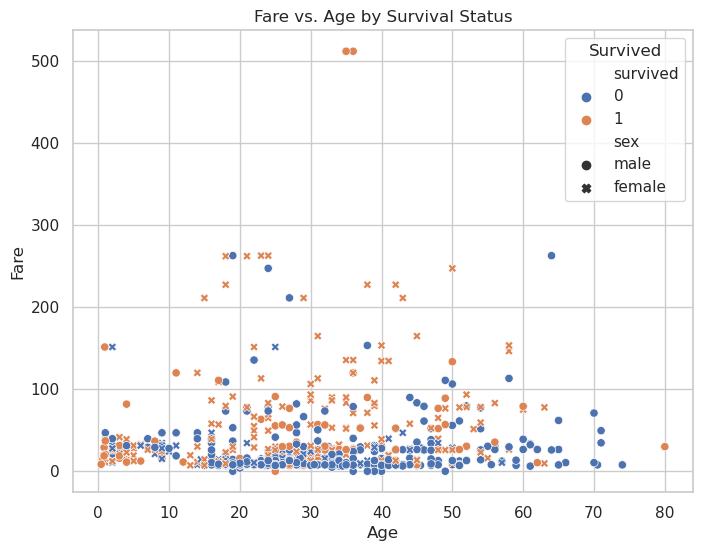

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")

# Task 1: Load and Explore the Dataset
try:
    # Load Titanic dataset from seaborn
    df = sns.load_dataset("titanic")
    
    print("First 5 rows of the dataset:")
    print(df.head())

    print("\nData types and missing values:")
    print(df.info())

    print("\nMissing values:")
    print(df.isnull().sum())

    # Clean dataset: drop rows with missing age or embarked
    df = df.dropna(subset=['age', 'embarked'])
    df['embarked'] = df['embarked'].fillna('S')
except Exception as e:
    print(f"Error loading dataset: {e}")

# Task 2: Basic Data Analysis
print("\nSummary statistics:")
print(df.describe())

# Group by class and compute average fare and age
grouped_stats = df.groupby('pclass')[['fare', 'age']].mean()
print("\nAverage fare and age by class:")
print(grouped_stats)

# Observation
print("\nObservation:")
print("1st class passengers paid the highest fare and were older on average.")

# Task 3: Data Visualization

# 1. Line chart: number of survivors over age (trend)
plt.figure(figsize=(10, 5))
survivors_by_age = df[df['survived'] == 1].groupby('age').size()
plt.plot(survivors_by_age.index, survivors_by_age.values, label='Survivors')
plt.title("Number of Survivors by Age")
plt.xlabel("Age")
plt.ylabel("Number of Survivors")
plt.legend()
plt.grid(True)
plt.show()

# 2. Bar chart: average fare by passenger class
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='pclass', y='fare', estimator='mean')
plt.title("Average Fare by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare")
plt.show()

# 3. Histogram: distribution of passenger ages
plt.figure(figsize=(7, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter plot: Fare vs. Age by Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='survived', style='sex')
plt.title("Fare vs. Age by Survival Status")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()
